In [144]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [155]:
FILE_PATH = 'data/pilot2.json'

all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

330

In [156]:
#control is hard condition, exp is easy condition, should change variable names
control_start, exp_start = [], []
control_finish, exp_finish = [], []
starts = [control_start, exp_start]
finishes = [control_finish, exp_finish]

for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']['conditionNumber']
        starts[condition].append(entry)
    else:
        condition = entry['data'][0]['conditionNumber']
        finishes[condition].append(entry)

print(len(control_start), len(exp_start))
print(len(control_finish), len(exp_finish))


81 89
73 87


In [176]:
contol_aha, control_pleasant, control_correct = [], [], [] #final ratings for the last anagram
control_pleasant1, control_pleasant2, control_pleasant3, control_pleasant4 = [], [], [],[]
for entry in control_finish:
    entry_data = entry['data']
        
    correct = 0 #number of correct answers
    answers = ['organic', 'naughty', 'hammock', 'durable']
    
    for n in [4,8,12,16]: #loop to collect answers
        ans = entry_data[n]['responses'] #get people's answer here 
        for k in [0,1,2,3]:
            if answers[k].lower() in ans.lower():
                correct = correct+1 #get total number of anagrams people got correct here
    
    #collect pleasantness ratings
    r = entry_data[5]['responses'] #get people's pleasant rating here
    control_pleasant1.append(int(r[6]))
    
    r = entry_data[9]['responses']
    control_pleasant2.append(int(r[6]))
    
    r = entry_data[13]['responses'] 
    control_pleasant3.append(int(r[6]))
    
    r = entry_data[17]['responses'] 
    control_pleasant4.append(int(r[6]))
    
    #check whether their answer to delta was correct or not. 
    
    last = entry_data[20]['responses'] #did they get the correct answer for last anagram here
    check = 0
    ans = ['delta', 'taled', 'dealt']
    for k in [0,1,2]:
        if ans[k].lower() in last.lower():
            check = 1            
    
    if check > 0 and correct < 1 : #only get data if they got the last anagram and remove people if they got all answers correct
    
        rating = entry_data[23]['responses'] #aha response here
        contol_aha.append(rating[6])
        rating = entry_data[22]['responses'] #pleasant response here
        control_pleasant.append(rating[6])
        control_correct.append(correct)
    else:
        continue
            
exp_aha, exp_pleasant, exp_correct = [], [], []
exp_pleasant1, exp_pleasant2, exp_pleasant3, exp_pleasant4 = [], [], [],[]
for entry in exp_finish:
    entry_data = entry['data']
    
    correct = 0 #number of correct answers
    answers = ['door', 'bulk', 'pint', 'sort', 'rots']
    for n in [4,8,12,16]:
        ans = entry_data[n]['responses'] #get people's answer here 
        for k in [0,1,2,3,4]:
            if answers[k].lower() in ans.lower():
                correct = correct+1 #get total number of anagrams people got correct here
                
    #collect pleasantness ratings
    r = entry_data[5]['responses'] #get people's pleasant rating here
    exp_pleasant1.append(int(r[6]))
    
    r = entry_data[9]['responses']
    exp_pleasant2.append(int(r[6]))
    
    r = entry_data[13]['responses'] 
    exp_pleasant3.append(int(r[6]))
    
    r = entry_data[17]['responses'] 
    exp_pleasant4.append(int(r[6]))
   
    last = entry_data[20]['responses'] #did they get the correct answer for last anagram here
    check = 0
    ans = ['delta', 'taled', 'dealt']
    for k in [0,1,2]:
        if ans[k].lower() in last.lower():
            check = 1
            
    if check > 0 and correct > 3: #only get data if they got the last anagram and remove people if they didnt get a single answer correct
    
        rating = entry_data[23]['responses'] #aha response here
        exp_aha.append(rating[6])
        rating = entry_data[22]['responses'] #pleasant response here
        exp_pleasant.append(rating[6])
        exp_correct.append(correct)
    else:
        continue   
        
def clean(values):
    return [int(value)+1 for value in values]

contol_aha = clean(contol_aha)
control_pleasant = clean(control_pleasant)
exp_aha, exp_pleasant = clean(exp_aha), clean(exp_pleasant)
          
print(len(contol_aha), len(exp_aha))
#print(len(exp_aha), len(exp_pleasant))

22 56


4.2272727272727275 3.4107142857142856


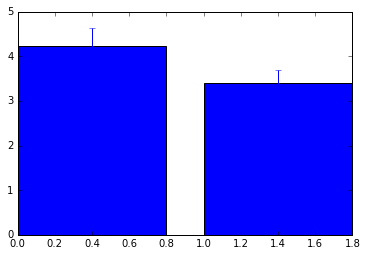

0.42857227552291866


In [177]:
control_aha_mean = np.mean(contol_aha)
control_aha_error = stats.sem(contol_aha)
exp_aha_mean = np.mean(exp_aha)
exp_aha_error = stats.sem(exp_aha)

plt.bar(
    np.arange(2),
    [control_aha_mean, exp_aha_mean],
    yerr=[control_aha_error, exp_aha_error]
)

print(control_aha_mean, exp_aha_mean)

plt.show()

print((control_aha_mean-exp_aha_mean)/np.std(contol_aha))


In [178]:
t, p = ttest_ind(contol_aha, exp_aha)
print(t, p)

1.5540485933672084 0.12432747449900594


5.053571428571429
5.621621621621622


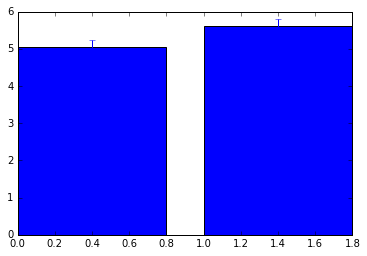

In [163]:
control_pleasant_mean = np.mean(control_pleasant)
control_pleasant_error = stats.sem(control_pleasant)
exp_pleasant_mean = np.mean(exp_pleasant)
exp_pleasant_error = stats.sem(exp_pleasant)

print(control_pleasant_mean)
print(exp_pleasant_mean)

plt.bar(
    np.arange(2),
    [control_pleasant_mean, exp_pleasant_mean],
    yerr=[control_pleasant_error, exp_pleasant_error]
)
plt.show()

In [79]:
t, p = ttest_ind(control_pleasant, exp_pleasant, equal_var=False)
print(t, p)

-2.2507547540098867 0.028227372708127745


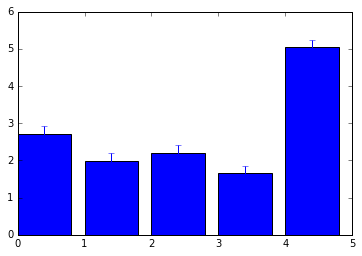

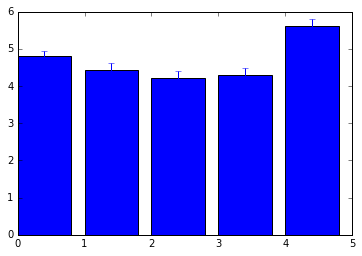

In [164]:
#perhaps it would be best if we didn't ask people 
#if they got the answer correctly or not in the fifth trial - new pilot for that
#maybe can reduce time to 10 seconds to avoid cheating even more
#also would best to give a four letter anagram in the last, instead of delta

control_pleasant_mean1 = np.mean(control_pleasant1)
control_pleasant_error1 = stats.sem(control_pleasant1)
control_pleasant_mean2 = np.mean(control_pleasant2)
control_pleasant_error2 = stats.sem(control_pleasant2)
control_pleasant_mean3 = np.mean(control_pleasant3)
control_pleasant_error3 = stats.sem(control_pleasant3)
control_pleasant_mean4 = np.mean(control_pleasant4)
control_pleasant_error4 = stats.sem(control_pleasant4)
control_pleasant_mean = np.mean(control_pleasant) #final anagram
control_pleasant_error = stats.sem(control_pleasant)

plt.bar(
    np.arange(5),
    [control_pleasant_mean1, control_pleasant_mean2, control_pleasant_mean3, control_pleasant_mean4, control_pleasant_mean],
    yerr=[control_pleasant_error1, control_pleasant_error2, control_pleasant_error3, control_pleasant_error4, control_pleasant_error]
)
plt.show()

plt.figure(2)

exp_pleasant_mean1 = np.mean(exp_pleasant1)
exp_pleasant_error1 = stats.sem(exp_pleasant1)
exp_pleasant_mean2 = np.mean(exp_pleasant2)
exp_pleasant_error2 = stats.sem(exp_pleasant2)
exp_pleasant_mean3 = np.mean(exp_pleasant3)
exp_pleasant_error3 = stats.sem(exp_pleasant3)
exp_pleasant_mean4 = np.mean(exp_pleasant4)
exp_pleasant_error4 = stats.sem(exp_pleasant4)
exp_pleasant_mean = np.mean(exp_pleasant) #final anagram
exp_pleasant_error = stats.sem(exp_pleasant)

plt.bar(
    np.arange(5),
    [exp_pleasant_mean1, exp_pleasant_mean2, exp_pleasant_mean3, exp_pleasant_mean4, exp_pleasant_mean],
    yerr=[exp_pleasant_error1, exp_pleasant_error2, exp_pleasant_error3, exp_pleasant_error4, exp_pleasant_error]
)
plt.show()


TypeError: 'type' object is not subscriptable